In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('../data/files/bike_hour.csv')

In [3]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
df = df[['season', 'temp', 'registered']]
df.head()

,season,temp,registered
0,1,0.24,13
1,1,0.22,32
2,1,0.22,27
3,1,0.24,10
4,1,0.24,1


In [5]:
df.shape

(17379, 3)

In [6]:
mpl.rcParams['figure.figsize'] = (24, 6)
mpl.rcParams['font.size'] = 18

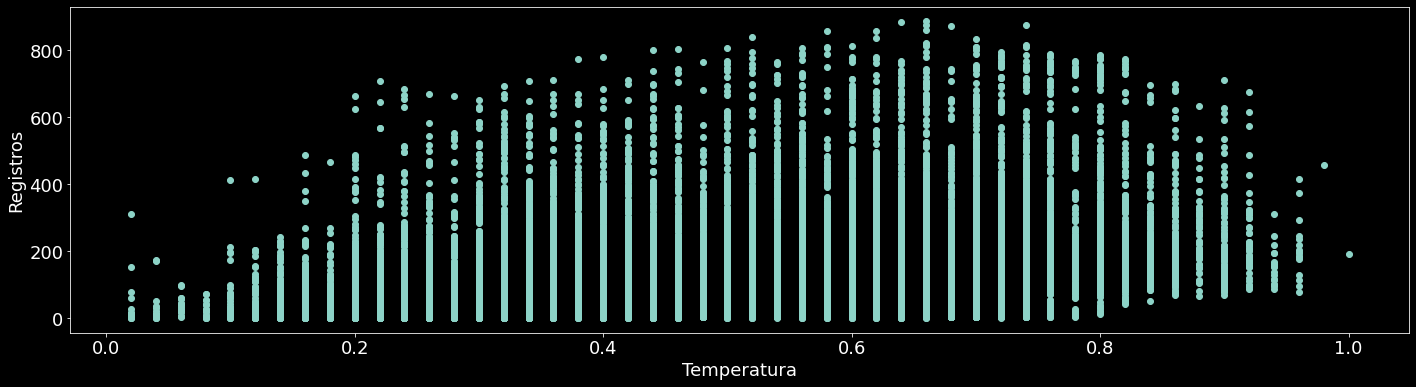

In [7]:
plt.scatter(df['temp'], df['registered'])
plt.xlabel('Temperatura')
plt.ylabel('Registros')
plt.show()

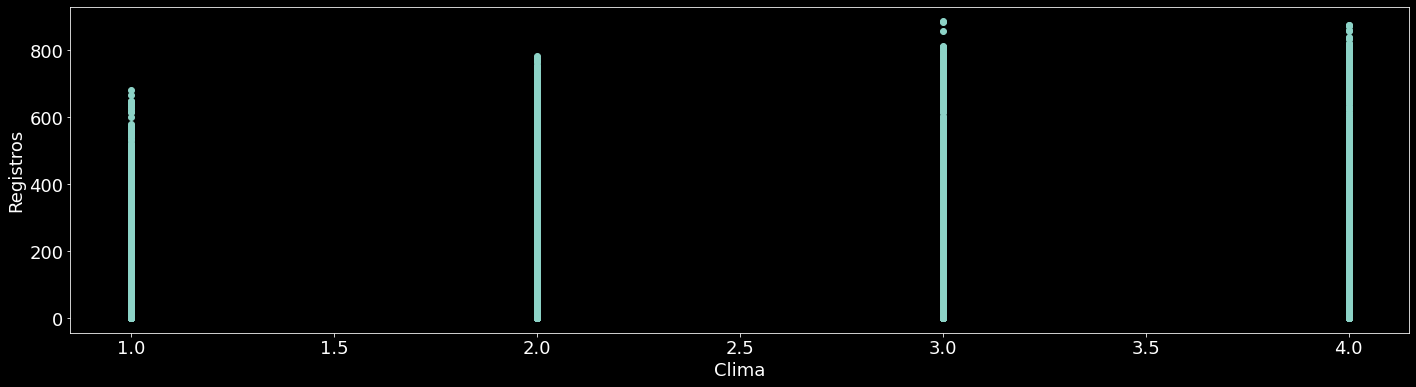

In [8]:
plt.scatter(df['season'], df['registered'])
plt.ylabel('Registros')
plt.xlabel('Clima')
plt.show()

In [9]:
y = df['registered'].values
x = df[['season', 'temp']].values

In [24]:
# normalizar os dados
x_amax = x/np.amax(x, axis=0)
y_amax = y/np.amax(y)

print(f'dados normalizados y: {y_amax}')
print(f'dados normalizados x: {x_amax}')

dados normalizados y: [0.01467269 0.03611738 0.03047404 ... 0.09367946 0.05417607 0.04176072]
dados normalizados x: [[0.25 0.24]
 [0.25 0.22]
 [0.25 0.22]
 ...
 [0.25 0.26]
 [0.25 0.26]
 [0.25 0.26]]


In [11]:
def sigmoid(soma):
    return 1/(1+np.exp(-soma))


In [12]:
def relu(soma):
    return np.maximum(0, soma)


In [13]:
arquitetura = [
    {'dim_entrada': 2, 'dim_saida': 3, 'ativacao': 'relu'},
    {'dim_entrada': 3, 'dim_saida': 1, 'ativacao': 'sigmoid'},
]


In [14]:
def inicia_camadas(arquitetura, seed=99):
    np.random.seed(seed)

    numero_camadas = len(arquitetura)
    valores_parametros = {}

    for indice, camada in enumerate(arquitetura):
        indice_camada = indice + 1

        tamanho_camada_entrada = camada['dim_entrada']
        tamanho_camada_saida = camada['dim_saida']

        valores_parametros['p' + str(indice_camada)] = np.random.randn(
            tamanho_camada_saida, tamanho_camada_entrada)

        valores_parametros['b' + str(indice_camada)] = np.random.randn(
            tamanho_camada_saida, 1) * 0.1

    return valores_parametros


In [18]:
def propaga_camada(ativado_anterior, peso_atual, bias_atual, ativacao='relu'):
    saida_atual = np.dot(peso_atual, ativado_anterior) + bias_atual

    if ativacao == 'relu':
        fn_ativacao = relu
    elif ativacao == 'sigmoid':
        fn_ativacao = sigmoid

    return fn_ativacao(saida_atual), saida_atual


In [19]:
def propaga_multi_camada(x, valores_parametros, arquitetura_rede):
    memoria = {}
    ativado_atual = x

    for indice, camada in enumerate(arquitetura_rede):
        indice_camada = indice + 1
        ativado_anterior = ativado_atual
        fn_ativacao_atual = camada['ativacao']
        peso_atual = valores_parametros['p' + str(indice_camada)]
        bias_atual = valores_parametros['b' + str(indice_camada)]

        ativado_atual, saida_atual = propaga_camada(ativado_anterior, peso_atual,
                                                    bias_atual, fn_ativacao_atual)

        memoria['a' + str(indice)] = ativado_anterior
        memoria['z' + str(indice_camada)] = saida_atual
        
    return ativado_atual, memoria


In [20]:
valores_parametros = inicia_camadas(arquitetura, seed=99)

In [21]:
y_estimado, memoria = propaga_multi_camada(
    np.transpose(x), valores_parametros, arquitetura)


In [25]:
y_estimado[0, 0] * y_amax

array([0.00304422, 0.00749347, 0.00632261, ..., 0.01943619, 0.0112402 ,
       0.00866432])

In [26]:
y[0] * y_amax

array([0.00021529, 0.00052994, 0.00044714, ..., 0.00137453, 0.00079491,
       0.00061274])

In [ ]:
def valor_loss(y_predict, y):
    m = y_predict.shape[1]
    loss = 1/m * (np.dot(y, np.log(y_predict).T) +
                  np.dot(1-y, np.log(1 - y_predict).T))

    return np.squeeze(loss)
